In [1]:
import json
import numpy as np
from IPython.display import display, HTML
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import os

In [2]:
planner_names = [
    "MTGTaskPlanner",
    "MTGTaskPlannerWithGMM",
#     "DynamicMTGTaskPlannerWithGMM",
#     "DynamicMTGTaskPlannerWithGMM_V2",
    "DynamicMTGTaskPlannerWithGMM_25.0",
#     "DynamicMTGTaskPlannerWithGMM_50.0",
#     "DynamicMTGTaskPlannerWithGMM_75.0",
    # "DynamicMTGTaskPlannerWithGMM_100.0",
    "MTGTaskPlannerWithAtlas",
#     "DynamicMTGPlannerWithAtlas",
#     "DynamicMTGPlannerWithAtlas_V2",
#     "DynamicMTGPlannerWithAtlas_25.0",
    "DynamicMTGPlannerWithAtlas_50.0",
#     "DynamicMTGPlannerWithAtlas_75.0",
    # "DynamicMTGTaskPlannerWithAtlas_100.0",

]


In [3]:
def read_json(file_path):
    """
    Reads a json file
    """
    result_data = []
    # Open the file and load JSON data
    with open(file_path, 'r') as json_file:
        for line in json_file:
            try:
                result_data.append(json.loads(line))
            except:
                continue
    return result_data
    

In [22]:
filepaths = [
            "../check/self_generated/maze/result_gmm.json", 
            "../check/self_generated/open_wardrobe/result_gmm.json", 
            "../check/self_generated/open_bottle/result_gmm.json", 
            "../check/self_generated/open_drawer/result_gmm.json", 
            "../check/self_generated/shelf/result_gmm.json", 
            "../check/self_generated/pour_water/result_gmm.json", 
            ]

problems = [
    "maze",
    "open_door",
    "open_bottle",
    "open_drawer",
    "shelf",
    "pour_water",
#     "slide_cup",
]

all_dfs = pd.DataFrame()

for problem in problems:
    file_path = "../check/old_good_res/self_generated/%s/result_gmm_2.json"%problem
    print(problem)
    if not os.path.exists(file_path):
        file_path = "../check/old_good_res/self_generated/%s/result_gmm.json"%problem
        if not os.path.exists(file_path):
            continue
        
    
    result_data = read_json(file_path)
    planner_stats = {
                        planner_name: {
                            'num' : 0, 
                            'num_success' : [], 
                            'motion_planning_time' : [],
                            'task_planning_time' : [],
                            'updating_time' : [],
                            'solution_length' : [],
                            'num_attempts' : [],
                            'total_planning_time' : [],
                            'set_start_and_goal_time' : [],
                            'task_graph_size' : [],
                            'current_task_graph_size' : [],
                        } 

                     for planner_name in planner_names
                    }

    for d in result_data:
        if d['planner_name'] in planner_stats:
            dic = planner_stats[d['planner_name']]
            dic['num'] += 1
            dic['num_success'].append(d['success'] == "true")
            if d['success'] == "true":
                dic['motion_planning_time'].append(d['motion_planning_time'])
                dic['task_planning_time'].append(d['task_planning_time'])
                dic['total_planning_time'].append(d['total_planning_time'])
                dic['updating_time'].append(d['updating_time'])
                dic['solution_length'].append(d['solution_length'])
                dic['num_attempts'].append(d['num_attempts'])
                dic['set_start_and_goal_time'].append(d['set_start_and_goal_time'])
                dic['task_graph_size'].append(d['task_graph_size'])
                dic['current_task_graph_size'].append(d['current_task_graph_size'])

    output_dict = []
    for planner_name in planner_names:
        stats = planner_stats[planner_name]

        current_planner_eval_dict = {}
        current_planner_eval_dict["Planner Name"] = planner_name
        current_planner_eval_dict["Success Rate"] = np.mean(stats['num_success']) * 100.0
        current_planner_eval_dict["Total Planning Time"] = np.mean(np.array(stats['total_planning_time']) )
        current_planner_eval_dict["Mean number of attempts"] = np.mean((np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean Task Planning Time"] = np.mean(np.array(stats['task_planning_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean Update time"] = np.mean(np.array(stats['updating_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean solution length"] = np.mean(np.array(stats['solution_length']))# / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Task Graph Size"] = np.mean(np.array(stats['task_graph_size']))# / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Current Task Graph Size"] = np.mean(np.array(stats['current_task_graph_size']))# / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Current Task Graph Perc"] = np.mean(np.array(stats['current_task_graph_size'])) * 100.0 / np.mean(np.array(stats['task_graph_size']))# / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Total Number of Tasks"] = len(stats['num_success'])
#         current_planner_eval_dict["Mean Motion Planning Time"] = np.mean(np.array(stats['motion_planning_time']))# / (np.array(stats['num_attempts'])) )
#         current_planner_eval_dict["Set Start and Goal Time"] = np.mean(np.array(stats['set_start_and_goal_time']) )
        output_dict.append(current_planner_eval_dict)
    df = pd.DataFrame(output_dict).set_index("Planner Name")[
        [
            "Success Rate",
            "Total Planning Time",
            "Mean number of attempts",
            "Mean Task Planning Time",
            "Mean Update time",
            "Mean solution length",
            "Task Graph Size",
            "Current Task Graph Size",
            "Total Number of Tasks",
            "Current Task Graph Perc",
        ]
    ]
    all_dfs = pd.concat([all_dfs,df], axis = 0 )

    display(df)
# all_dfs

maze


,Success Rate,Total Planning Time,Mean number of attempts,Mean Task Planning Time,Mean Update time,Mean solution length,Task Graph Size,Current Task Graph Size,Total Number of Tasks,Current Task Graph Perc
Planner Name,,,,,,,,,,
MTGTaskPlanner,6.000,10.418,6.333,0.022,0.054,35.052,2224.000,2224.000,50,100.000
MTGTaskPlannerWithGMM,66.000,16.501,7.424,0.283,0.161,26.721,32228.000,32228.000,50,100.000
DynamicMTGTaskPlannerWithGMM_25.0,62.000,10.466,4.516,0.325,0.066,25.289,32228.000,9120.710,50,28.301
MTGTaskPlannerWithAtlas,64.000,12.726,6.094,0.291,0.147,22.919,32228.000,32228.000,50,100.000
DynamicMTGPlannerWithAtlas_50.0,70.000,13.179,5.571,0.337,0.076,25.208,32228.000,8175.086,50,25.366


open_door


,Success Rate,Total Planning Time,Mean number of attempts,Mean Task Planning Time,Mean Update time,Mean solution length,Task Graph Size,Current Task Graph Size,Total Number of Tasks,Current Task Graph Perc
Planner Name,,,,,,,,,,
MTGTaskPlanner,70.000,91.606,14.229,0.027,0.058,26.807,2822.000,2822.000,50,100.000
MTGTaskPlannerWithGMM,78.000,40.405,5.385,0.290,0.118,22.891,32752.000,32752.000,50,100.000
DynamicMTGTaskPlannerWithGMM_25.0,80.000,28.918,5.350,0.261,0.061,21.713,32752.000,7261.925,50,22.172
MTGTaskPlannerWithAtlas,92.000,34.289,5.087,0.286,0.087,19.285,32752.000,32752.000,50,100.000
DynamicMTGPlannerWithAtlas_50.0,92.000,31.765,5.130,0.234,0.045,20.337,32752.000,6284.761,50,19.189


open_bottle


,Success Rate,Total Planning Time,Mean number of attempts,Mean Task Planning Time,Mean Update time,Mean solution length,Task Graph Size,Current Task Graph Size,Total Number of Tasks,Current Task Graph Perc
Planner Name,,,,,,,,,,
MTGTaskPlanner,nan,nan,nan,nan,nan,nan,nan,nan,0,nan
MTGTaskPlannerWithGMM,nan,nan,nan,nan,nan,nan,nan,nan,0,nan
DynamicMTGTaskPlannerWithGMM_25.0,15.217,27.847,7.857,0.092,0.040,24.308,68122.000,4778.857,46,7.015
MTGTaskPlannerWithAtlas,nan,nan,nan,nan,nan,nan,nan,nan,0,nan
DynamicMTGPlannerWithAtlas_50.0,nan,nan,nan,nan,nan,nan,nan,nan,0,nan


open_drawer


,Success Rate,Total Planning Time,Mean number of attempts,Mean Task Planning Time,Mean Update time,Mean solution length,Task Graph Size,Current Task Graph Size,Total Number of Tasks,Current Task Graph Perc
Planner Name,,,,,,,,,,
MTGTaskPlanner,62.000,61.039,12.581,0.031,0.049,33.246,1618.000,1618.000,50,100.000
MTGTaskPlannerWithGMM,88.000,15.665,3.227,0.148,0.149,27.733,30918.000,30918.000,50,100.000
DynamicMTGTaskPlannerWithGMM_25.0,88.000,15.337,3.682,0.159,0.067,25.474,30918.000,4908.341,50,15.875
MTGTaskPlannerWithAtlas,100.000,16.265,3.120,0.161,0.128,23.660,30918.000,30918.000,50,100.000
DynamicMTGPlannerWithAtlas_50.0,100.000,10.431,2.480,0.138,0.072,24.085,30918.000,4617.340,50,14.934


shelf


,Success Rate,Total Planning Time,Mean number of attempts,Mean Task Planning Time,Mean Update time,Mean solution length,Task Graph Size,Current Task Graph Size,Total Number of Tasks,Current Task Graph Perc
Planner Name,,,,,,,,,,
MTGTaskPlanner,30.000,98.994,15.533,0.517,0.290,34.241,8792.000,8792.000,50,100.000
MTGTaskPlannerWithGMM,78.000,92.259,9.872,0.459,0.255,42.431,109518.000,109518.000,50,100.000
DynamicMTGTaskPlannerWithGMM_25.0,62.000,47.131,5.806,0.247,0.099,33.486,109518.000,6530.613,50,5.963
MTGTaskPlannerWithAtlas,100.000,23.147,2.620,0.580,0.248,30.990,109518.000,109518.000,50,100.000
DynamicMTGPlannerWithAtlas_50.0,100.000,16.692,1.980,0.095,0.098,29.080,109518.000,5473.920,50,4.998


pour_water


,Success Rate,Total Planning Time,Mean number of attempts,Mean Task Planning Time,Mean Update time,Mean solution length,Task Graph Size,Current Task Graph Size,Total Number of Tasks,Current Task Graph Perc
Planner Name,,,,,,,,,,
MTGTaskPlanner,nan,nan,nan,nan,nan,nan,nan,nan,0,nan
MTGTaskPlannerWithGMM,nan,nan,nan,nan,nan,nan,nan,nan,0,nan
DynamicMTGTaskPlannerWithGMM_25.0,nan,nan,nan,nan,nan,nan,nan,nan,0,nan
MTGTaskPlannerWithAtlas,nan,nan,nan,nan,nan,nan,nan,nan,0,nan
DynamicMTGPlannerWithAtlas_50.0,nan,nan,nan,nan,nan,nan,nan,nan,0,nan


In [5]:
def bold_style(val):
    f = "font-weight: bold" 
    #condition
    mask_max = val.eq(val == 0)
    max_cols = ["Success Rate"]
    min_cols = ["Total Planning Time", "Mean number of attempts", "Mean Task Planning Time", "Mean Update time", "Mean solution length"]
    mask_max[min_cols] = val[min_cols].eq(val[min_cols].min())
    mask_max[max_cols] = val[max_cols].eq(val[max_cols].max())
    # DataFrame of styles
    df1 = pd.DataFrame('', index=val.index, columns=val.columns)
    # set columns by condition
    df1 = df1.mask(mask_max, f)
    return df1

df.style.apply(bold_style, axis=None)
display(df)

,Success Rate,Total Planning Time,Mean number of attempts,Mean Task Planning Time,Mean Update time,Mean solution length
Planner Name,,,,,,
MTGTaskPlanner,nan,nan,nan,nan,nan,nan
MTGTaskPlannerWithGMM,nan,nan,nan,nan,nan,nan
DynamicMTGTaskPlannerWithGMM,77.778,20.294,8.286,0.365,0.069,25.341
MTGTaskPlannerWithAtlas,nan,nan,nan,nan,nan,nan
DynamicMTGPlannerWithAtlas,nan,nan,nan,nan,nan,nan


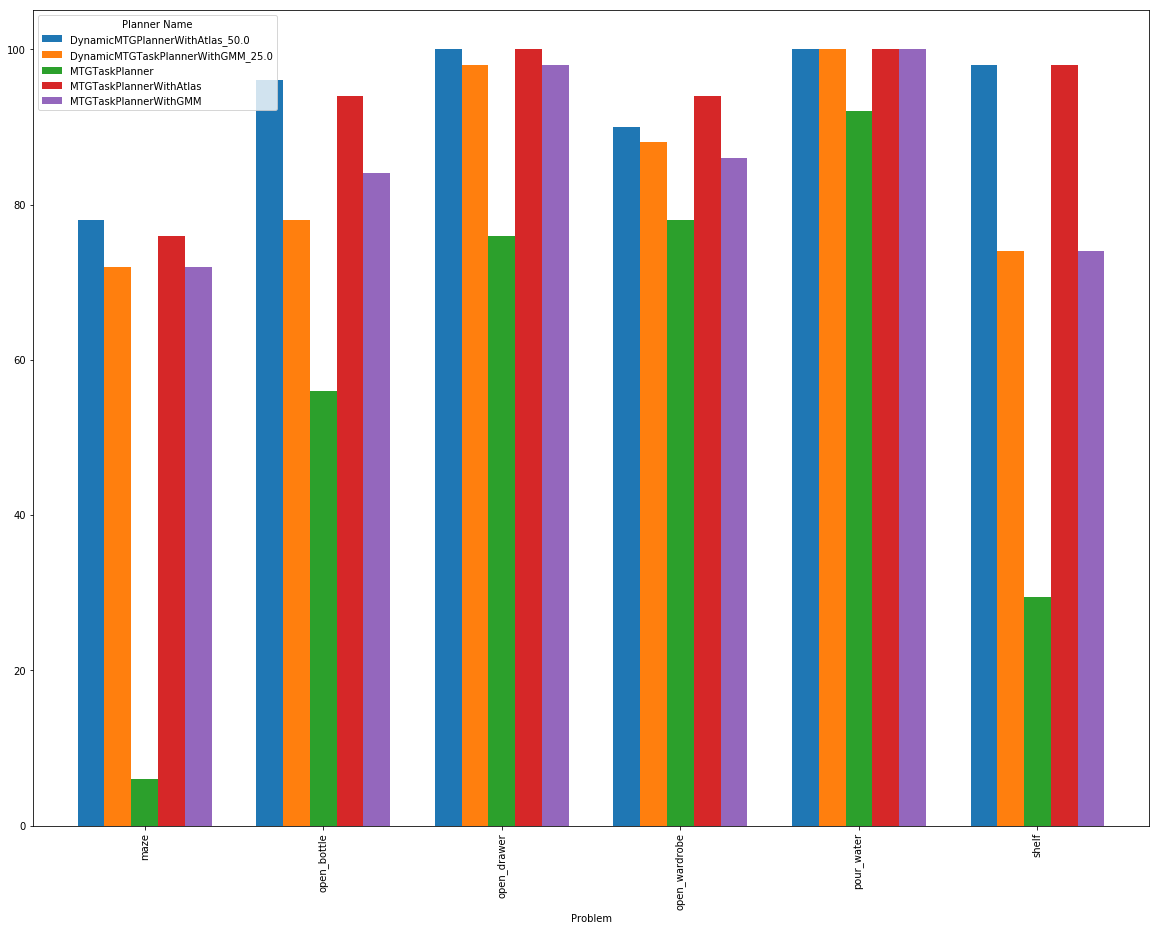

In [33]:
all_dfs.pivot(index = "Problem", columns = "Planner Name", values = "Success Rate").plot(kind = "bar", width = 0.75, figsize = (20,15))

In [20]:
filepaths = ["../check/drive_problems/final_expt/open_bottle/result_dpgmm_with_weight.json", 
            "../check/drive_problems/final_expt/door/result_dpgmm_with_weight.json",
            "../check/drive_problems/final_expt/pour_water_seq/result_dpgmm_with_weight.json",
             "../check/drive_problems/final_expt/drawer/result_dpgmm_with_weight.json",
             "../check/drive_problems/final_expt/maze/result_dpgmm_with_weight.json",
             "../check/drive_problems/final_expt/shelf/result_dpgmm_with_weight.json",
            ]


for file_path in filepaths:
    print(file_path)
    try:
        result_data = read_json(file_path)
    except:
        continue
    planner_stats = {
                        planner_name: {
                            'num' : 0, 
                            'num_success' : [], 
                            'motion_planning_time' : [],
                            'task_planning_time' : [],
                            'updating_time' : [],
                            'solution_length' : [],
                            'num_attempts' : [],
                            'total_planning_time' : [],
                            'set_start_and_goal_time' : [],
                        } 

                     for planner_name in planner_names
                    }

    for d in result_data:
        if d['planner_name'] in planner_stats:
            dic = planner_stats[d['planner_name']]
            dic['num'] += 1
            dic['num_success'].append(d['success'] == "true")
            if d['success'] == "true":
                dic['motion_planning_time'].append(d['motion_planning_time'])
                dic['task_planning_time'].append(d['task_planning_time'])
                dic['total_planning_time'].append(d['total_planning_time'])
                dic['updating_time'].append(d['updating_time'])
                dic['solution_length'].append(d['solution_length'])
                dic['num_attempts'].append(d['num_attempts'])
                dic['set_start_and_goal_time'].append(d['set_start_and_goal_time'])

    output_dict = []
    for planner_name in planner_names:
        stats = planner_stats[planner_name]

        current_planner_eval_dict = {}
        current_planner_eval_dict["Planner Name"] = planner_name
        current_planner_eval_dict["Total Number of Tasks"] = len(stats['num_success'])
        current_planner_eval_dict["Success Rate"] = np.mean(stats['num_success']) * 100.0
        current_planner_eval_dict["Mean Task Planning Time"] = np.mean(np.array(stats['task_planning_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean Motion Planning Time"] = np.mean(np.array(stats['motion_planning_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Total Planning Time"] = np.mean(np.array(stats['total_planning_time']) )
        current_planner_eval_dict["Set Start and Goal Time"] = np.mean(np.array(stats['set_start_and_goal_time']) )
        current_planner_eval_dict["Mean Update time"] = np.mean(np.array(stats['updating_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean solution length"] = np.mean(np.array(stats['solution_length']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean number of attempts"] = np.mean((np.array(stats['num_attempts'])) )
        output_dict.append(current_planner_eval_dict)
    df = pd.DataFrame(output_dict).set_index('Planner Name')

    display(df)

../check/drive_problems/final_expt/open_bottle/result_dpgmm_with_weight.json


,Mean Motion Planning Time,Mean Task Planning Time,Mean Update time,Mean number of attempts,Mean solution length,Set Start and Goal Time,Success Rate,Total Number of Tasks,Total Planning Time
Planner Name,,,,,,,,,
MTGTaskPlanner,5.6275,0.6008,0.5028,10.3077,7.0272,0.0006,26.0000,50,78.9436
MTGTaskPlannerWithGMM,3.9598,0.4792,0.4261,3.6327,10.3117,0.0086,98.0000,50,19.6145
DynamicMTGTaskPlannerWithGMM_25.0,6.6731,0.0006,0.1847,3.1600,13.9719,2.9860,100.0000,50,17.4530
DynamicMTGTaskPlannerWithGMM_50.0,nan,nan,nan,nan,nan,nan,nan,0,nan
DynamicMTGTaskPlannerWithGMM_75.0,nan,nan,nan,nan,nan,nan,nan,0,nan
MTGTaskPlannerWithAtlas,4.8880,0.5483,0.5002,2.5833,13.0560,0.0117,96.0000,50,14.6623
DynamicMTGPlannerWithAtlas_25.0,6.5029,0.0409,0.1880,2.9722,14.0763,2.7171,100.0000,36,18.6447
DynamicMTGPlannerWithAtlas_50.0,6.6015,0.0008,0.2156,2.3400,13.2423,3.0149,100.0000,50,13.8390
DynamicMTGPlannerWithAtlas_75.0,nan,nan,nan,nan,nan,nan,nan,0,nan


../check/drive_problems/final_expt/door/result_dpgmm_with_weight.json


,Mean Motion Planning Time,Mean Task Planning Time,Mean Update time,Mean number of attempts,Mean solution length,Set Start and Goal Time,Success Rate,Total Number of Tasks,Total Planning Time
Planner Name,,,,,,,,,
MTGTaskPlanner,5.8630,0.0500,0.0695,12.3750,9.4489,0.0002,80.0000,50,71.7209
MTGTaskPlannerWithGMM,4.9427,0.5374,0.4437,7.1224,7.2051,0.0081,98.0000,50,44.5590
DynamicMTGTaskPlannerWithGMM_25.0,6.3077,0.0906,0.1086,6.4468,7.1024,2.5042,94.0000,50,47.1125
DynamicMTGTaskPlannerWithGMM_50.0,nan,nan,nan,nan,nan,nan,nan,0,nan
DynamicMTGTaskPlannerWithGMM_75.0,nan,nan,nan,nan,nan,nan,nan,0,nan
MTGTaskPlannerWithAtlas,5.5428,0.6720,0.4508,5.5918,7.1082,0.0109,98.0000,50,38.0422
DynamicMTGPlannerWithAtlas_25.0,5.4149,0.0742,0.1051,5.8421,6.1578,2.3144,100.0000,19,32.5378
DynamicMTGPlannerWithAtlas_50.0,5.7594,0.0513,0.1085,7.7551,7.7243,2.6336,98.0000,50,44.5961
DynamicMTGPlannerWithAtlas_75.0,nan,nan,nan,nan,nan,nan,nan,0,nan


../check/drive_problems/final_expt/pour_water_seq/result_dpgmm_with_weight.json


,Mean Motion Planning Time,Mean Task Planning Time,Mean Update time,Mean number of attempts,Mean solution length,Set Start and Goal Time,Success Rate,Total Number of Tasks,Total Planning Time
Planner Name,,,,,,,,,
MTGTaskPlanner,4.5974,0.7956,0.4829,8.7800,14.9208,0.0012,100.0000,50,58.6290
MTGTaskPlannerWithGMM,3.1131,0.8610,0.7862,2.2000,15.1737,0.0087,100.0000,50,11.7939
DynamicMTGTaskPlannerWithGMM_25.0,4.3460,0.0672,0.3563,3.0400,13.9778,5.0337,100.0000,50,14.8965
DynamicMTGTaskPlannerWithGMM_50.0,4.0548,0.0196,0.3335,2.9400,15.5327,4.9585,100.0000,50,12.7337
DynamicMTGTaskPlannerWithGMM_75.0,7.2560,0.0030,0.3109,3.9167,13.5938,5.0882,100.0000,36,20.1578
MTGTaskPlannerWithAtlas,3.5717,1.0072,0.8631,1.7000,15.7297,0.0110,100.0000,50,9.7188
DynamicMTGPlannerWithAtlas_25.0,4.3026,0.0388,0.3756,2.2000,14.7255,5.2238,100.0000,50,10.4131
DynamicMTGPlannerWithAtlas_50.0,3.4250,0.0325,0.3664,2.4800,14.2538,5.1395,100.0000,50,10.6914
DynamicMTGPlannerWithAtlas_75.0,nan,nan,nan,nan,nan,nan,nan,0,nan


../check/drive_problems/final_expt/drawer/result_dpgmm_with_weight.json
../check/drive_problems/final_expt/maze/result_dpgmm_with_weight.json


,Mean Motion Planning Time,Mean Task Planning Time,Mean Update time,Mean number of attempts,Mean solution length,Set Start and Goal Time,Success Rate,Total Number of Tasks,Total Planning Time
Planner Name,,,,,,,,,
MTGTaskPlanner,1.4113,0.0198,0.1119,24.0000,1.5598,0.0001,2.0000,50,37.0386
MTGTaskPlannerWithGMM,1.3608,0.2665,0.2881,8.4773,10.1349,0.0092,88.0000,50,18.6961
DynamicMTGTaskPlannerWithGMM_25.0,1.3446,0.1384,0.1223,8.1220,10.9899,1.0693,82.0000,50,19.2173
DynamicMTGTaskPlannerWithGMM_50.0,1.2806,0.1289,0.0989,6.8222,11.5627,0.9799,90.0000,50,15.0963
DynamicMTGTaskPlannerWithGMM_75.0,1.3134,0.1234,0.0955,6.9556,10.7297,0.9892,90.0000,50,14.2244
MTGTaskPlannerWithAtlas,1.2472,0.2550,0.3106,4.2105,11.6714,0.0101,76.0000,50,9.5818
DynamicMTGPlannerWithAtlas_25.0,1.1787,0.0719,0.1080,3.9000,13.2661,1.0503,80.0000,50,7.2984
DynamicMTGPlannerWithAtlas_50.0,1.3024,0.0796,0.1244,4.0250,13.0370,1.0799,80.0000,50,8.0247
DynamicMTGPlannerWithAtlas_75.0,1.2929,0.0964,0.1065,4.5349,12.2668,0.9667,86.0000,50,9.0279


../check/drive_problems/final_expt/shelf/result_dpgmm_with_weight.json


,Mean Motion Planning Time,Mean Task Planning Time,Mean Update time,Mean number of attempts,Mean solution length,Set Start and Goal Time,Success Rate,Total Number of Tasks,Total Planning Time
Planner Name,,,,,,,,,
MTGTaskPlanner,4.2376,0.1235,0.1606,12.2308,7.9796,0.0004,26.0000,50,57.2901
MTGTaskPlannerWithGMM,4.4712,0.2162,0.5333,3.8511,19.9815,0.0084,94.0000,50,21.3723
DynamicMTGTaskPlannerWithGMM_25.0,5.5212,0.0809,0.2363,3.4490,19.0133,1.8261,98.0000,50,19.8974
DynamicMTGTaskPlannerWithGMM_50.0,5.0692,0.0269,0.2114,3.2308,20.7547,1.6661,83.8710,31,16.5333
DynamicMTGTaskPlannerWithGMM_75.0,nan,nan,nan,nan,nan,nan,nan,0,nan
MTGTaskPlannerWithAtlas,5.4963,0.2926,0.5961,2.3000,20.4401,0.0113,100.0000,50,14.5477
DynamicMTGPlannerWithAtlas_25.0,5.3958,0.0135,0.2119,1.4200,22.6873,1.7390,100.0000,50,8.0013
DynamicMTGPlannerWithAtlas_50.0,5.9186,0.0007,0.2437,1.2800,23.6523,1.9163,100.0000,50,7.9338
DynamicMTGPlannerWithAtlas_75.0,nan,nan,nan,nan,nan,nan,nan,0,nan


In [21]:
filepaths = ["../check/drive_problems/final_expt/open_bottle/result_gmm_without_weight.json", 
            "../check/drive_problems/final_expt/door/result_gmm_without_weight.json",
            "../check/drive_problems/final_expt/pour_water_seq/result_gmm_without_weight.json",
             "../check/drive_problems/final_expt/drawer/result_gmm_without_weight.json",
             "../check/drive_problems/final_expt/maze/result_gmm_without_weight.json",
             "../check/drive_problems/final_expt/shelf/result_gmm_without_weight.json",
            ]


for file_path in filepaths:
    print(file_path)
    try:
        result_data = read_json(file_path)
    except:
        continue
    planner_stats = {
                        planner_name: {
                            'num' : 0, 
                            'num_success' : [], 
                            'motion_planning_time' : [],
                            'task_planning_time' : [],
                            'updating_time' : [],
                            'solution_length' : [],
                            'num_attempts' : [],
                            'total_planning_time' : [],
                            'set_start_and_goal_time' : [],
                        } 

                     for planner_name in planner_names
                    }

    for d in result_data:
        if d['planner_name'] in planner_stats:
            dic = planner_stats[d['planner_name']]
            dic['num'] += 1
            dic['num_success'].append(d['success'] == "true")
            if d['success'] == "true":
                dic['motion_planning_time'].append(d['motion_planning_time'])
                dic['task_planning_time'].append(d['task_planning_time'])
                dic['total_planning_time'].append(d['total_planning_time'])
                dic['updating_time'].append(d['updating_time'])
                dic['solution_length'].append(d['solution_length'])
                dic['num_attempts'].append(d['num_attempts'])
                dic['set_start_and_goal_time'].append(d['set_start_and_goal_time'])

    output_dict = []
    for planner_name in planner_names:
        stats = planner_stats[planner_name]

        current_planner_eval_dict = {}
        current_planner_eval_dict["Planner Name"] = planner_name
        current_planner_eval_dict["Total Number of Tasks"] = len(stats['num_success'])
        current_planner_eval_dict["Success Rate"] = np.mean(stats['num_success']) * 100.0
        current_planner_eval_dict["Mean Task Planning Time"] = np.mean(np.array(stats['task_planning_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean Motion Planning Time"] = np.mean(np.array(stats['motion_planning_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Total Planning Time"] = np.mean(np.array(stats['total_planning_time']) )
        current_planner_eval_dict["Set Start and Goal Time"] = np.mean(np.array(stats['set_start_and_goal_time']) )
        current_planner_eval_dict["Mean Update time"] = np.mean(np.array(stats['updating_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean solution length"] = np.mean(np.array(stats['solution_length']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean number of attempts"] = np.mean((np.array(stats['num_attempts'])) )
        output_dict.append(current_planner_eval_dict)
    df = pd.DataFrame(output_dict).set_index('Planner Name')

    display(df)

../check/drive_problems/final_expt/open_bottle/result_gmm_without_weight.json


,Mean Motion Planning Time,Mean Task Planning Time,Mean Update time,Mean number of attempts,Mean solution length,Set Start and Goal Time,Success Rate,Total Number of Tasks,Total Planning Time
Planner Name,,,,,,,,,
MTGTaskPlanner,6.0704,0.8226,0.4461,18.8000,8.4134,0.0006,37.0370,27,154.9169
MTGTaskPlannerWithGMM,4.0390,0.3937,0.4142,4.3673,11.1378,0.0080,98.0000,50,22.0515
DynamicMTGTaskPlannerWithGMM_25.0,8.7135,0.0041,0.2328,4.5306,13.6137,2.3328,98.0000,50,33.2369
DynamicMTGTaskPlannerWithGMM_50.0,nan,nan,nan,nan,nan,nan,nan,0,nan
DynamicMTGTaskPlannerWithGMM_75.0,nan,nan,nan,nan,nan,nan,nan,0,nan
MTGTaskPlannerWithAtlas,4.7868,0.4115,0.4467,2.8837,12.6105,0.0117,86.0000,50,16.6144
DynamicMTGPlannerWithAtlas_25.0,nan,nan,nan,nan,nan,nan,nan,0,nan
DynamicMTGPlannerWithAtlas_50.0,8.3487,0.0019,0.2665,3.0000,14.4872,2.3546,100.0000,50,21.4314
DynamicMTGPlannerWithAtlas_75.0,nan,nan,nan,nan,nan,nan,nan,0,nan


../check/drive_problems/final_expt/door/result_gmm_without_weight.json


,Mean Motion Planning Time,Mean Task Planning Time,Mean Update time,Mean number of attempts,Mean solution length,Set Start and Goal Time,Success Rate,Total Number of Tasks,Total Planning Time
Planner Name,,,,,,,,,
MTGTaskPlanner,6.1324,0.0385,0.0805,15.5455,5.8193,0.0002,78.5714,14,96.0683
MTGTaskPlannerWithGMM,5.2954,0.3585,0.4831,7.2500,7.4244,0.0084,96.0000,50,43.5916
DynamicMTGTaskPlannerWithGMM_25.0,6.7183,0.0047,0.0929,9.9302,5.4781,1.7848,86.0000,50,70.3828
DynamicMTGTaskPlannerWithGMM_50.0,nan,nan,nan,nan,nan,nan,nan,0,nan
DynamicMTGTaskPlannerWithGMM_75.0,nan,nan,nan,nan,nan,nan,nan,0,nan
MTGTaskPlannerWithAtlas,6.0420,0.3662,0.4574,6.7021,7.1935,0.0103,94.0000,50,47.8114
DynamicMTGPlannerWithAtlas_25.0,nan,nan,nan,nan,nan,nan,nan,0,nan
DynamicMTGPlannerWithAtlas_50.0,8.1866,0.0239,0.1180,9.4130,5.3427,2.0284,92.0000,50,72.4082
DynamicMTGPlannerWithAtlas_75.0,nan,nan,nan,nan,nan,nan,nan,0,nan


../check/drive_problems/final_expt/pour_water_seq/result_gmm_without_weight.json
../check/drive_problems/final_expt/drawer/result_gmm_without_weight.json


,Mean Motion Planning Time,Mean Task Planning Time,Mean Update time,Mean number of attempts,Mean solution length,Set Start and Goal Time,Success Rate,Total Number of Tasks,Total Planning Time
Planner Name,,,,,,,,,
MTGTaskPlanner,4.5312,0.0179,0.0472,13.0526,10.4022,0.0002,76.0000,50,68.3924
MTGTaskPlannerWithGMM,3.1128,0.1799,0.4051,3.0000,13.6834,0.0095,98.0000,50,11.7358
DynamicMTGTaskPlannerWithGMM_25.0,4.0059,0.0523,0.1051,4.5400,10.9889,0.9807,100.0000,50,20.6229
DynamicMTGTaskPlannerWithGMM_50.0,3.8978,0.0562,0.1012,4.4400,10.4549,0.8773,100.0000,50,18.3817
DynamicMTGTaskPlannerWithGMM_75.0,3.9575,0.0591,0.1019,4.8980,9.9582,0.8899,98.0000,50,20.9215
MTGTaskPlannerWithAtlas,3.8008,0.1574,0.4012,2.8200,13.5566,0.0121,100.0000,50,13.1300
DynamicMTGPlannerWithAtlas_25.0,4.4025,0.0427,0.1182,4.1000,9.9198,0.9851,100.0000,50,20.4777
DynamicMTGPlannerWithAtlas_50.0,4.0406,0.0193,0.1118,3.2200,9.9231,1.0233,100.0000,50,13.6309
DynamicMTGPlannerWithAtlas_75.0,4.1717,0.0360,0.1079,3.6600,10.1233,0.9467,100.0000,50,15.9703


../check/drive_problems/final_expt/maze/result_gmm_without_weight.json
../check/drive_problems/final_expt/shelf/result_gmm_without_weight.json


,Mean Motion Planning Time,Mean Task Planning Time,Mean Update time,Mean number of attempts,Mean solution length,Set Start and Goal Time,Success Rate,Total Number of Tasks,Total Planning Time
Planner Name,,,,,,,,,
MTGTaskPlanner,5.6120,0.1135,0.1962,7.0000,6.5551,0.0003,16.6667,6,41.4549
MTGTaskPlannerWithGMM,4.0344,0.2039,0.4236,5.5000,9.2472,0.0087,64.0000,50,29.8204
DynamicMTGTaskPlannerWithGMM_25.0,5.3886,0.1758,0.3422,6.9512,10.0374,1.4008,82.0000,50,45.5396
DynamicMTGTaskPlannerWithGMM_50.0,nan,nan,nan,nan,nan,nan,nan,0,nan
DynamicMTGTaskPlannerWithGMM_75.0,nan,nan,nan,nan,nan,nan,nan,0,nan
MTGTaskPlannerWithAtlas,6.1459,0.2177,0.6117,2.9000,15.9759,0.0118,100.0000,50,19.7093
DynamicMTGPlannerWithAtlas_25.0,nan,nan,nan,nan,nan,nan,nan,0,nan
DynamicMTGPlannerWithAtlas_50.0,6.6535,0.0244,0.2356,2.7200,15.2140,1.5589,100.0000,50,18.1673
DynamicMTGPlannerWithAtlas_75.0,nan,nan,nan,nan,nan,nan,nan,0,nan


In [6]:
filepaths = ["..//task_set/maze/result.json"]


for file_path in filepaths:
    print(file_path)
    result_data = read_json(file_path)
    planner_stats = {
                        planner_name: {
                            'num' : 0, 
                            'num_success' : [], 
                            'motion_planning_time' : [],
                            'task_planning_time' : [],
                            'updating_time' : [],
                            'solution_length' : [],
                            'num_attempts' : [],
                            'total_planning_time' : [],
                            'set_start_and_goal_time' : [],
                        } 

                     for planner_name in planner_names
                    }

    for d in result_data:
        if d['planner_name'] in planner_stats:
            dic = planner_stats[d['planner_name']]
            dic['num'] += 1
            dic['num_success'].append(d['success'] == "true")
            if d['success'] == "true":
                dic['motion_planning_time'].append(d['motion_planning_time'])
                dic['task_planning_time'].append(d['task_planning_time'])
                dic['total_planning_time'].append(d['total_planning_time'])
                dic['updating_time'].append(d['updating_time'])
                dic['solution_length'].append(d['solution_length'])
                dic['num_attempts'].append(d['num_attempts'])
                dic['set_start_and_goal_time'].append(d['set_start_and_goal_time'])

    output_dict = []
    for planner_name in planner_names:
        stats = planner_stats[planner_name]

        current_planner_eval_dict = {}
        current_planner_eval_dict["Planner Name"] = planner_name
        current_planner_eval_dict["Total Number of Tasks"] = len(stats['num_success'])
        current_planner_eval_dict["Success Rate"] = np.mean(stats['num_success']) * 100.0
        current_planner_eval_dict["Mean Task Planning Time"] = np.mean(np.array(stats['task_planning_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean Motion Planning Time"] = np.mean(np.array(stats['motion_planning_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Total Planning Time"] = np.mean(np.array(stats['total_planning_time']) )
        current_planner_eval_dict["Set Start and Goal Time"] = np.mean(np.array(stats['set_start_and_goal_time']) )
        current_planner_eval_dict["Mean Update time"] = np.mean(np.array(stats['updating_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean solution length"] = np.mean(np.array(stats['solution_length']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean number of attempts"] = np.mean((np.array(stats['num_attempts'])) )
        output_dict.append(current_planner_eval_dict)
    df = pd.DataFrame(output_dict).set_index('Planner Name')

    display(df)

..//task_set/maze/result.json


,Mean Motion Planning Time,Mean Task Planning Time,Mean Update time,Mean number of attempts,Mean solution length,Set Start and Goal Time,Success Rate,Total Number of Tasks,Total Planning Time
Planner Name,,,,,,,,,
MTGTaskPlanner,1.4601,0.0328,0.1524,19.5000,3.8749,0.0001,36.0000,50,33.9821
MTGTaskPlannerWithGMM,1.3204,0.3202,0.4900,4.7021,14.0403,0.0118,94.0000,50,11.7586
DynamicMTGTaskPlannerWithGMM_25.0,1.2849,0.0896,0.1600,4.1633,15.4046,1.3495,98.0000,50,9.2817
DynamicMTGTaskPlannerWithGMM_50.0,1.2430,0.0882,0.1654,3.6122,14.6593,1.3320,98.0000,50,7.7502
MTGTaskPlannerWithAtlas,1.2535,0.2727,0.4723,3.8889,14.5608,0.0121,90.0000,50,9.2803
DynamicMTGPlannerWithAtlas_25.0,1.2319,0.0219,0.1556,1.8696,16.2415,1.3995,92.0000,50,3.0983
DynamicMTGPlannerWithAtlas_50.0,1.1524,0.1141,0.1799,5.2083,14.7829,1.4238,96.0000,50,12.8904


In [7]:
filepaths = ["..//task_set/open_bottle/result.json"]


for file_path in filepaths:
    print(file_path)
    result_data = read_json(file_path)
    planner_stats = {
                        planner_name: {
                            'num' : 0, 
                            'num_success' : [], 
                            'motion_planning_time' : [],
                            'task_planning_time' : [],
                            'updating_time' : [],
                            'solution_length' : [],
                            'num_attempts' : [],
                            'total_planning_time' : [],
                            'set_start_and_goal_time' : [],
                        } 

                     for planner_name in planner_names
                    }

    for d in result_data:
        if d['planner_name'] in planner_stats:
            dic = planner_stats[d['planner_name']]
            dic['num'] += 1
            dic['num_success'].append(d['success'] == "true")
            if d['success'] == "true":
                dic['motion_planning_time'].append(d['motion_planning_time'])
                dic['task_planning_time'].append(d['task_planning_time'])
                dic['total_planning_time'].append(d['total_planning_time'])
                dic['updating_time'].append(d['updating_time'])
                dic['solution_length'].append(d['solution_length'])
                dic['num_attempts'].append(d['num_attempts'])
                dic['set_start_and_goal_time'].append(d['set_start_and_goal_time'])

    output_dict = []
    for planner_name in planner_names:
        stats = planner_stats[planner_name]

        current_planner_eval_dict = {}
        current_planner_eval_dict["Planner Name"] = planner_name
        current_planner_eval_dict["Total Number of Tasks"] = len(stats['num_success'])
        current_planner_eval_dict["Success Rate"] = np.mean(stats['num_success']) * 100.0
        current_planner_eval_dict["Mean Task Planning Time"] = np.mean(np.array(stats['task_planning_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean Motion Planning Time"] = np.mean(np.array(stats['motion_planning_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Total Planning Time"] = np.mean(np.array(stats['total_planning_time']) )
        current_planner_eval_dict["Set Start and Goal Time"] = np.mean(np.array(stats['set_start_and_goal_time']) )
        current_planner_eval_dict["Mean Update time"] = np.mean(np.array(stats['updating_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean solution length"] = np.mean(np.array(stats['solution_length']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean number of attempts"] = np.mean((np.array(stats['num_attempts'])) )
        output_dict.append(current_planner_eval_dict)
    df = pd.DataFrame(output_dict).set_index('Planner Name')

    display(df)

..//task_set/open_bottle/result.json


/home/jiaming/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jiaming/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Mean Motion Planning Time,Mean Task Planning Time,Mean Update time,Mean number of attempts,Mean solution length,Set Start and Goal Time,Success Rate,Total Number of Tasks,Total Planning Time
Planner Name,,,,,,,,,
MTGTaskPlanner,5.5080,0.8499,0.7035,14.3000,8.2983,0.0008,40.0000,50,104.6951
MTGTaskPlannerWithGMM,4.9042,0.7324,0.5466,4.6735,7.9646,0.0115,98.0000,50,31.8155
DynamicMTGTaskPlannerWithGMM_25.0,5.6376,0.1417,0.2001,28.0000,4.1925,3.4126,100.0000,5,155.6299
DynamicMTGTaskPlannerWithGMM_50.0,nan,nan,nan,nan,nan,nan,nan,0,nan
MTGTaskPlannerWithAtlas,4.7319,0.6816,0.5119,3.9524,10.4508,0.0111,84.0000,50,25.3063
DynamicMTGPlannerWithAtlas_25.0,nan,nan,nan,nan,nan,nan,nan,0,nan
DynamicMTGPlannerWithAtlas_50.0,nan,nan,nan,nan,nan,nan,nan,0,nan


In [8]:
filepaths = ["..//task_set/pour_water_seq/result.json"]


for file_path in filepaths:
    print(file_path)
    result_data = read_json(file_path)
    planner_stats = {
                        planner_name: {
                            'num' : 0, 
                            'num_success' : [], 
                            'motion_planning_time' : [],
                            'task_planning_time' : [],
                            'updating_time' : [],
                            'solution_length' : [],
                            'num_attempts' : [],
                            'total_planning_time' : [],
                            'set_start_and_goal_time' : [],
                        } 

                     for planner_name in planner_names
                    }

    for d in result_data:
        if d['planner_name'] in planner_stats:
            dic = planner_stats[d['planner_name']]
            dic['num'] += 1
            dic['num_success'].append(d['success'] == "true")
            if d['success'] == "true":
                dic['motion_planning_time'].append(d['motion_planning_time'])
                dic['task_planning_time'].append(d['task_planning_time'])
                dic['total_planning_time'].append(d['total_planning_time'])
                dic['updating_time'].append(d['updating_time'])
                dic['solution_length'].append(d['solution_length'])
                dic['num_attempts'].append(d['num_attempts'])
                dic['set_start_and_goal_time'].append(d['set_start_and_goal_time'])

    output_dict = []
    for planner_name in planner_names:
        stats = planner_stats[planner_name]

        current_planner_eval_dict = {}
        current_planner_eval_dict["Planner Name"] = planner_name
        current_planner_eval_dict["Total Number of Tasks"] = len(stats['num_success'])
        current_planner_eval_dict["Success Rate"] = np.mean(stats['num_success']) * 100.0
        current_planner_eval_dict["Mean Task Planning Time"] = np.mean(np.array(stats['task_planning_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean Motion Planning Time"] = np.mean(np.array(stats['motion_planning_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Total Planning Time"] = np.mean(np.array(stats['total_planning_time']) )
        current_planner_eval_dict["Set Start and Goal Time"] = np.mean(np.array(stats['set_start_and_goal_time']) )
        current_planner_eval_dict["Mean Update time"] = np.mean(np.array(stats['updating_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean solution length"] = np.mean(np.array(stats['solution_length']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean number of attempts"] = np.mean((np.array(stats['num_attempts'])) )
        output_dict.append(current_planner_eval_dict)
    df = pd.DataFrame(output_dict).set_index('Planner Name')

    display(df)

..//task_set/pour_water_seq/result.json


,Mean Motion Planning Time,Mean Task Planning Time,Mean Update time,Mean number of attempts,Mean solution length,Set Start and Goal Time,Success Rate,Total Number of Tasks,Total Planning Time
Planner Name,,,,,,,,,
MTGTaskPlanner,4.7186,1.2233,0.5576,5.2000,16.7975,0.0093,100.0000,50,37.1212
MTGTaskPlannerWithGMM,4.0616,0.8897,1.2307,1.7400,16.3628,0.0122,100.0000,50,11.7650
DynamicMTGTaskPlannerWithGMM_25.0,4.3223,0.0299,0.4335,2.6800,15.2710,6.1597,100.0000,50,14.2608
DynamicMTGTaskPlannerWithGMM_50.0,4.5064,0.0018,0.4263,3.1000,15.7724,6.1322,100.0000,50,15.2547
MTGTaskPlannerWithAtlas,3.6373,1.1654,1.0912,1.8000,16.3336,0.0128,100.0000,50,11.5964
DynamicMTGPlannerWithAtlas_25.0,4.0836,0.0893,0.4623,2.7200,14.0533,6.2484,100.0000,50,13.3870
DynamicMTGPlannerWithAtlas_50.0,4.2023,0.0684,0.4404,3.5400,12.8493,6.4593,100.0000,50,17.9758


In [9]:
filepaths = ["..//task_set/shelf/result.json"]


for file_path in filepaths:
    print(file_path)
    result_data = read_json(file_path)
    planner_stats = {
                        planner_name: {
                            'num' : 0, 
                            'num_success' : [], 
                            'motion_planning_time' : [],
                            'task_planning_time' : [],
                            'updating_time' : [],
                            'solution_length' : [],
                            'num_attempts' : [],
                            'total_planning_time' : [],
                            'set_start_and_goal_time' : [],
                        } 

                     for planner_name in planner_names
                    }

    for d in result_data:
        if d['planner_name'] in planner_stats:
            dic = planner_stats[d['planner_name']]
            dic['num'] += 1
            dic['num_success'].append(d['success'] == "true")
            if d['success'] == "true":
                dic['motion_planning_time'].append(d['motion_planning_time'])
                dic['task_planning_time'].append(d['task_planning_time'])
                dic['total_planning_time'].append(d['total_planning_time'])
                dic['updating_time'].append(d['updating_time'])
                dic['solution_length'].append(d['solution_length'])
                dic['num_attempts'].append(d['num_attempts'])
                dic['set_start_and_goal_time'].append(d['set_start_and_goal_time'])

    output_dict = []
    for planner_name in planner_names:
        stats = planner_stats[planner_name]

        current_planner_eval_dict = {}
        current_planner_eval_dict["Planner Name"] = planner_name
        current_planner_eval_dict["Total Number of Tasks"] = len(stats['num_success'])
        current_planner_eval_dict["Success Rate"] = np.mean(stats['num_success']) * 100.0
        current_planner_eval_dict["Mean Task Planning Time"] = np.mean(np.array(stats['task_planning_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean Motion Planning Time"] = np.mean(np.array(stats['motion_planning_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Total Planning Time"] = np.mean(np.array(stats['total_planning_time']) )
        current_planner_eval_dict["Set Start and Goal Time"] = np.mean(np.array(stats['set_start_and_goal_time']) )
        current_planner_eval_dict["Mean Update time"] = np.mean(np.array(stats['updating_time']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean solution length"] = np.mean(np.array(stats['solution_length']) / (np.array(stats['num_attempts'])) )
        current_planner_eval_dict["Mean number of attempts"] = np.mean((np.array(stats['num_attempts'])) )
        output_dict.append(current_planner_eval_dict)
    df = pd.DataFrame(output_dict).set_index('Planner Name')

    display(df)

..//task_set/shelf/result.json


,Mean Motion Planning Time,Mean Task Planning Time,Mean Update time,Mean number of attempts,Mean solution length,Set Start and Goal Time,Success Rate,Total Number of Tasks,Total Planning Time
Planner Name,,,,,,,,,
MTGTaskPlanner,5.2146,0.1886,0.1951,13.6970,11.6718,0.0004,66.0000,50,91.8334
MTGTaskPlannerWithGMM,5.9381,0.3976,0.8273,2.4490,19.0389,0.0120,98.0000,50,18.0543
DynamicMTGTaskPlannerWithGMM_25.0,6.5506,0.0265,0.3097,2.1600,21.7487,2.3725,100.0000,50,14.0029
DynamicMTGTaskPlannerWithGMM_50.0,6.4967,0.0275,0.3079,2.3400,20.9628,2.2897,100.0000,50,14.5831
MTGTaskPlannerWithAtlas,6.6645,0.4319,0.8665,1.4600,22.1314,0.0136,100.0000,50,11.4756
DynamicMTGPlannerWithAtlas_25.0,7.0462,0.0010,0.3191,1.1800,25.8940,2.4004,100.0000,50,8.6243
DynamicMTGPlannerWithAtlas_50.0,6.6954,0.0010,0.2982,1.1600,27.0186,2.2874,100.0000,50,7.8690


In [43]:
!pip2 install jinja2

  Cache entry deserialization failed, entry ignored
    100% |################################| 133kB 2.1MB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
